<div style="border:1px solid black; padding:10px 10px;">
    <strong>CIVIL-321 "Modélisation Numérique des Solides et Structures"</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">Comment utiliser ce Jupyter Notebook?
    </span><br/><br/>
    Ce <strong>Notebook</strong> est constitué de cellules de texte et de cellule de code. Les cellules de codes doivent être  <strong>executées</strong> pour voir le résultat du programme. Certaines cellules doivent être remplies par vos soins. Pour exécuter une cellule, cliquez dessus simplement et ensuite cliquez sur le bouton "play" (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) dans la barre de menu au dessus du notebook. Vous pouvez aussi taper la combinaison de touches <code>shift + enter</code>. Il est important d'éxécuter les cellules de code en respectant leur ordre d'arrivée dans le notebook.
</div>

On vous encourage à poser vos questions et donner votre feedback sur ce notebook sur la plateforme ED Discussion du cours accessible en cliquant sur ce bouton:
 
 
 
<div class="container" >
        <a href="https://edstem.org/eu/courses/409/discussion?category=Exercices">
            <button class="btn btn-primary btn-lg">Ed Discussion</button>
        </a>
</div>

In [1]:
from utils import *

# Série d'exercices : Systèmes de ressorts

## Introduction

Cette séance d'exercice contient des exercices à faire à la main ainsi que par programmation sur Python. Tout peut être fait dans ce *Notebook*.

## À lire avant de commencer


- Les index sur Python commence à 0 (et non à 1 **contrairement à Matlab**). 
- Les matrices sont crées via le module *Numpy* (https://numpy.org/doc/stable/reference/arrays.ndarray.html)

In [2]:
# exemple, creation d'une matrice 
import numpy as np
A = np.array([[1,2],[3, 4]])

- La fonction `plot_matrix(matrix, matrix_name)` permet de visualiser les matrices. 
  Elle prend en entrée:       
        - matrix : le nom de la variable      
        - matrix_name = 'nom_matrix'

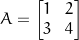

In [3]:
# exemple d'affichage
plot_matrix(A, 'A')

- l'extraction de bloc d'un vecteur ou d'une matrice se fait via les `slice` (https://numpy.org/doc/stable/reference/arrays.indexing.html)

In [4]:
# exraction d'une ligne
plot_matrix(A[0, :], 'A_{{0, x}}')

# exraction d'une colonne
plot_matrix(A[:, 1], 'A_{{x, 1}}')

## Exercice 1: Assemblage de matrice (à la main)

![](Figures/ex1.svg)

*Système de ressorts considéré. $u_i$ sont les déplacements nodaux, $F_i$ sont les forces nodales (appliquées aux noeuds).*

1. Calculer la matrice de rigidité gloable des manières suivantes:
  - en utilisant les équations d'équilibre pour chaque noeud 
  - en assemblant les matrices de rigidités locales des ressorts.

---

 **Solution:**

 ---



- Isolons le noeud 2:
  ![](Figures/ex1-1.svg)
 
  *Figure: Équilibre du noeud 2. La force appliquée est $F_2$. Les forces $f_1$, $f_2$ et $f_3$ sont les forces de rappel des ressorts 1, 2, et 3.*

  L'équilibre donne comme équation: $F_2 - f_1 - f_2 - f_3 = 0$
  
  On remplace $f_1$, $f_2$, $f_3 \qquad \Longrightarrow \qquad F_2 -k_1(u_2 - u_1) + k_2(u_3 - u_2) + k_3(u_4-u_2) = 0$
    
  En répétant le processus pour chaque noeud, nous trouvons un système d'équations linéaires dont la matrice est la matrice de rigidité globale:
    $$ \mathbf{K} = \begin{bmatrix}
      k_1 & -k_1 & 0 & 0\\
      -k_1 & k_1 + k_2 + k_3 & -k_2 & -k_3\\
      0 & -k_2 & k_2 & 0\\
      0 & -k_3 & 0 & k_3
    \end{bmatrix}$$
    
- La matrice de rigidité globale est l'assemblage des matrices de rigidité de chaque ressort:
    $$\mathbf{K} = \sum_{e=1}^N {\mathbf{k}^e}$$
   
    Pour chaque ressort, la matrice de rigidité locale est:
    $$\mathbf{k}^e = \begin{bmatrix}
      k_e & -k_e\\
      -k_e & k_e
    \end{bmatrix}$$

    Il faut cependant être attentif et se demander pour chaque noeud quels ressorts contribuent à la rigidité. 
    Par exemple:
    - Pour le noeud 1, seul le ressort 1 contribue. La première ligne et la première colonne de $\mathbf{K}$ vont donc être déterminées par la matrice de rigidité du ressort 1.
    - Le noeud 2 est relié à tous les ressorts. La deuxième ligne et la deuxième colonne de $\mathbf{K}$ seront donc déterminées par les trois matrices de rigidité.

    En applicant ce raisonnement pour chaque noeud, on obtient:
  
    $$\mathbf{K} = \begin{bmatrix}
      k_1 & -k_1 & 0 & 0\\
      -k_1 & k_1 + k_2 + k_3 & -k_2 & -k_3\\
      0 & -k_2 & k_2 & 0\\
      0 & -k_3 & 0 & k_3
    \end{bmatrix}$$

2. On applique les conditions limites $u_1 = u_3 = 0$ et $u_4 = \delta > 0$, et on pose $F_2 = 0$ (aucune force appliquée sur 2). Quelle est la valeur de $u_2$ ? Quelle est la force de réaction au noeud 4 ($F_4$) ?

---

 **Solution:**

 ---



On applique les conditions limite suivantes:
    - $u_1 = 0$
    - $u_3 = 0$
    - $u_4 = \delta$

Les deux premières conditions sont des conditions **homogènes**. On peut donc supprimer les lignes et colones de $\mathbf{K}$ correspondant à $u_1$ et $u_3$. Le système $\mathbf{K}u = F$ devient:

$$\begin{pmatrix}
k_1 + k_2 + k_3 & -k_3\\
-k_3 & k_3
\end{pmatrix} \begin{pmatrix}
u_2\\
u_4
\end{pmatrix} = \begin{pmatrix}
0\\
F_4
\end{pmatrix}$$

Ce système a deux équations et deux inconnues: $u_2$ et $F_4$, puisque $u_4 = \delta$. La résolution donne:
$$\begin{eqnarray*}
u_2 & = & \frac{k_3 \delta}{k_1 + k_2 + k_3}\\
F_4 & = & k_3 \delta \left( 1 - \frac{k_3}{k_1 + k_2 + k_3} \right)
\end{eqnarray*}$$

3. Sur le système initial, quel déplacement faut-il bloquer pour que les degrés de libertés restants soient indépendants les uns des autres ? Quelle est alors la particularité de la matrice de rigidité réduite ?

---

 **Solution:**

 ---



- Si le noeud 2 est bloqué, des forces ou des déplacements appliqués aux noeuds restants n'auront pas d'effet sur les autres noeuds. Si l'on applique la condition limite homogène $u_2 = 0$, la matrice de rigidité devient:
    $$\mathbf{K} = \begin{bmatrix}
      k_1 & 0 & 0\\
      0 & k_2 & 0\\
      0 & 0 & k_3
    \end{bmatrix}$$
    
    $\mathbf{K}$ est diagonale, ce qui exprime bien le fait qu'il n'y ait plus de relation entre les degrés de liberté du système.

## Exercice 2: Approximation d'une solution analytique (à la main + Python)

On considère un système de quatre ressorts en série. La rigidité totale du système est $k$. Il découle donc que $k_l = 4k$.

![](Figures/ex2.svg)

1. Donner, en fonction de $k_l$, la matrice de rigidité d'un élément.

---

 **Solution:**

 ---



$$\mathbf{k}^e = \begin{bmatrix}
    k_l & -k_l\\
    -k_l & k_l
    \end{bmatrix}$$

2. Assembler la matrice de rigidité globale, et donner son expression en fonction de $k$.

---

 **Solution:**

 ---



- $$\mathbf{K} = k \begin{pmatrix}
    4 & -4 & 0 & 0 & 0\\
    -4 & 8 & -4 & 0 & 0\\
    0 & -4 & 8 & -4 & 0\\
    0 & 0 & -4 & 8 & -4\\
    0 & 0 & 0 & -4 & 4\\
    \end{pmatrix}$$

On applique les conditions limites $u_1 = u_5 = 0$. On applique les forces:
$$F_2 = \frac{f}{4},\quad F_3 = \frac{f}{4},\quad F_4 = \frac{f}{4}$$


3. Calculer les déplacements $u_2$, $u_3$ et $u_4$ (en fonction de $f$ et de $k$).

---

 **Solution:**

 ---



$$k\begin{pmatrix}
          8 & -4 & 0\\
          -4 & 8 & -4\\
          0 & -4 & 8
        \end{pmatrix} \begin{pmatrix}
          u_2\\
          u_3\\
          u_4
        \end{pmatrix} = \frac{f}{4}\begin{pmatrix}
          1\\
          1\\
          1
        \end{pmatrix}$$
  Ce qui donne:
  $$\begin{pmatrix}
     u_2\\
     u_3\\
     u_4
    \end{pmatrix} = \frac{f}{4k}
    \begin{pmatrix}
     \frac{3}{8}\\[0.1cm]
     \frac{1}{2}\\[0.1cm]
     \frac{3}{8}
    \end{pmatrix}$$

4.Comparer ces valeurs avec le champ de déplacement analytique d'une barre bi-encastrée de longueur~$1$, de rigidité axiale $EA/L$ = $k$, soumise à une force axiale répartie: $q(x) = f$. Pour rappel, l'équation différentielle est:
 $$k\frac{\text{d}^2 u}{\text{d}x^2} = -q(x),\quad \text{avec}\ u(0) = 0\ \text{et}\ u(1) = 0$$

---

 **Solution:**

 ---



- L'équation différentielle se résoud par intégration successive, pour
  donner: $u(x) = \frac{f}{2k}(x-x^2)$
  
  Les déplacements aux positions de $u_2$, $u_3$ et $u_4$ sont:
  $$\begin{eqnarray*}
        u(\frac{1}{4}) & = & \frac{3f}{32k} = u_2\\
        u(\frac{1}{2}) & = & \frac{f}{8k} = u_3\\
        u(\frac{3}{4}) & = & \frac{3f}{32k} = u_4
      \end{eqnarray*}$$

5. **Avec Python**, nous allons refaire les questions 1 à 4 pour un système à $n$ ressorts ($n$ sera une variable). 

   **Attention**: la rigidité de chaque ressort dépend de n afin de conserver la rigidité totale
k.

  - Puisque chaque ressort a la même matrice de rigidité, créer une variable la contenant.

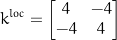

In [5]:
###########
# Solution:
##########


n = 4
k = 1
kl = n*k
kloc = kl*np.array([[1, -1], [-1, 1]])
plot_matrix(kloc, 'k^{{loc}}')

- Écrire la boucle d'assemblage de la matrice de rigidité globale (boucle sur les éléments).

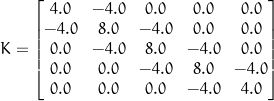

In [6]:
###########
# Solution:
##########


# On se sert de la connectivité pour assembler les matrices locales
# dans la matrice globale
# La taille de K est (N+1, N+1) car il y a N+1 noeuds

K = np.zeros((n+1, n+1))

for e in range(n):
    for i in range(2):
        for j in range(2):
            K[e+i, e+j] = K[e+i, e+j] + kloc[i, j]
            # ce qui s'écrit aussi
            # K[e+i, e+j] += kloc[i, j]
            
plot_matrix(K, 'K')

- Écrire la boucle qui remplit le vecteur des forces ($F_i = \frac{f}{n}$) (boucle sur les noeuds).

In [7]:
###########
# Solution:
##########


# On remplit le vecteur force, de taille N+1
# les valeurs de F(1) et F(N+1) ne sont pas importantes,
# elles sont ignorées lors de la résolution de Ku=F

f = 1
F = np.ones(n+1)*f/n

- Appliquer les conditions limites puis résoudre le système $[K]\{u\} = \{F\}$.

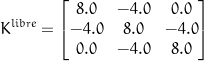

In [8]:
###########
# Solution:
##########


# On bloque les noeuds 1 et N+1
# Les noeuds libres sont donc les noeuds de 2 à N

noeuds_libres = range(1, n)
K_libre = K[noeuds_libres, :][:, noeuds_libres]
F_libre = F[noeuds_libres]

plot_matrix(K_libre, 'K^{{libre}}')
plot_matrix(F_libre, 'F^{{libre}}')

- Afficher la solution obtenue. Vous pouvez résoudre un système linéaire avec le fonction `solve` du Numpy (https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)

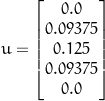

In [9]:
###########
# Solution:
##########


# On construit le vecteur des déplacements complet
u = np.zeros(n+1)

# Résolution de Ku = F
u[noeuds_libres] = np.linalg.solve(K_libre, F_libre)
plot_matrix(u, 'u')

- Afficher la solution analytique sous forme de graphique. Vous pourrez utiliser la fonction `plot` du module `matplotlib.pyplot` (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [10]:
###########
# Solution:
##########


import matplotlib.pyplot as plt

x_numeric = np.linspace(0, 1, n+1)
x_analytic = np.linspace(0, 1, 1000)
u_analytic = f / (2 * k) * (x_analytic - x_analytic**2);
plt.plot(x_numeric, u, label='numeric')
plt.plot(x_analytic, u_analytic, '--', label='analytic')
plt.legend()

6. Faire varier le nombre de ressorts pour montrer que la solution éléments finis se rapproche de la solution analytique quand le nombre de ressorts est grand.

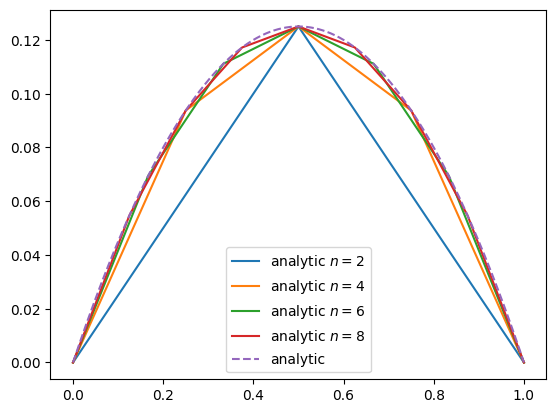

In [11]:
###########
# Solution:
##########


# On écrit une fonction qui résoud notre problème pour un n donné
def solve_problem(n):
    kl = n*k
    kloc = kl*np.array([[1, -1], [-1, 1]])

    K = np.zeros((n+1, n+1))

    for e in range(n):
        for i in range(2):
            for j in range(2):
                K[e+i, e+j] += kloc[i, j]
    
    f = 1
    F = np.ones(n+1)*f/n
            
    noeuds_libres = range(1, n)
    K_libre = K[noeuds_libres, :][:, noeuds_libres]
    F_libre = F[noeuds_libres]

    u = np.zeros(n+1)
    u[noeuds_libres] = np.linalg.solve(K_libre, F_libre)
    x = np.linspace(0, 1, n+1)
    return x, u

# on fait une boucle pour faire varier n
for n in range(2, 10, 2):
    x, u = solve_problem(n)
    plt.plot(x, u, label=f'analytic $n = {n}$')
    
plt.plot(x_analytic, u_analytic, '--', label='analytic')
plt.legend()

## Exercice 3: Système de ressorts (à la main)

Pour le système de ressorts représenté ci dessous:

![](Figures/ex3.svg)

1. Pour chaque ressort, calculez l'énergie élastique du système ($E_\text{el}$) en fonction des déplacements.

  Rappel de l'énergie potentielle d'un ressort:
  $$E = \frac{1}{2}k\Delta l^2$$
  Où $\Delta l$ est la variation de longeur du ressort.

---

 **Solution:**

 ---


  
$$\begin{equation*}
   E_\text{el} = \frac{1}{2} k_1 {\delta_1}^2 + \frac{1}{2} k_2 {\delta_2}^2 +
   \frac{1}{2} k_3 {\delta_3}^2 + \frac{1}{2} k_4 {\delta_4}^2
  \end{equation*}$$

où $\delta_i$ est l'allongement du $i^\text{ème}$ ressort. Exprimons ces allongement en fonction des déplacements:

$$\begin{align*}
      \delta_{1} &= u_1 - u_2 \\
      \delta_{2} &= u_2 \\
      \delta_{3} &= u_3 - u_2 \\
      \delta_{4} &= -u_3.
    \end{align*}$$

L'énergie potentielle totale peut donc être réécrite en fonction des déplacements:

$$\begin{equation*}
      E_\text{el} = \frac{1}{2} k_1 (u_1 - u_2)^2 + \frac{1}{2} k_2 {u_2}^2 +
      \frac{1}{2} k_3 (u_3 - u_2)^2 + \frac{1}{2} k_4 {u_3}^2
    \end{equation*}$$

2. Calculez le travail des forces extérieures $F_1$ et $F_3$ ($E_\text{Fext}$).

---

 **Solution:**

 ---



Le travail des forces extérieures est:
    $$E_\text{Fext} = F_1 u_1 + F_3 u_3$$

3. Calculez l'énergie potentielle totale du système $\Pi = E_\text{el} - E_\text{Fext}$, en fonction de $u_1$, $u_2$ et $u_3$.

---

 **Solution:**

 ---



L'énergie potentielle totale du système est:
    $$\Pi(u_1, u_2, u_3) = \frac{1}{2} k_1 (u_1 - u_2)^2 + \frac{1}{2} k_2 {u_2}^2 +
      \frac{1}{2} k_3 (u_3 - u_2)^2 + \frac{1}{2} k_4 {u_3}^2 - F_1
      u_1 - F_3 u_3$$

4. Donnez les équations que doivent satisfaire $u_1$, $u_2$ et $u_3$ pour minimiser l'énergie potentielle $\Pi$.
  Donner l'expression de la matrice de rigidité globale $K$.

---

 **Solution:**

 ---


      
Minimiser $\Pi$ par rapport à $u_1$,$u_2$ et $u_3$ nécessite

$$\begin{equation*}
      \frac{\partial \Pi}{\partial u_i} = 0 \quad\quad i=1,2,3.
    \end{equation*}$$

Les équations en résultant sont:

$$\begin{align*}
      \frac{\partial \Pi}{\partial u_1} &= k_1 \left(u_1 - u_2\right) - F_1 = 0 \\
      \frac{\partial \Pi}{\partial u_2} &= -k_1 \left(u_1 - u_2\right) + k_2 u_2 - k_3 \left(u_3 - u_2\right) = 0\\
      \frac{\partial \Pi}{\partial u_3} &= k_3 \left(u_3 - u_2\right) + k_4 u_3 - F_3 = 0.
    \end{align*}$$

5. Retrouver $K$ par la méthode de rigidité directe.

---

 **Solution:**

 ---



Elles peuvent être réécrites sous la forme matricielle

$$\begin{equation*}
      \left[\begin{array}{ccc}
          k_1 & -k_1 & 0 \\
          -k_1 & k_1+k_2+k_3 & -k_3 \\
          0 & -k_3 & k_3+k_4
        \end{array}\right] \left\{\begin{array}{c}
      u_1 \\ u_2 \\ u_3
      \end{array}\right\} = \left\{\begin{array}{c}
      F_1 \\ 0 \\ F_3
      \end{array}\right\}
    \end{equation*}$$